In [1]:
#Set up paths
import sys
import os

from Utils import utils as uti

from Utils import GridUtils as GrU
from Utils import MakePressures as MkP

import RegridField as RgF

import regrid_HRxLR as rHL


# The usual
from datetime import date
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Cartopy for pretty maps
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Some other useful packages 
import importlib
import copy
import time
import cftime
import yaml
import glob
#from box import Box #???

importlib.reload( rHL )
importlib.reload(MkP)
importlib.reload(GrU)


 Utils.MyConstants in /glade/work/juliob/HiRes_ana_repo2/Drivers/Utils 
Using Flexible parallel/serial VertRegrid 
 Utils.MyConstants in /glade/work/juliob/HiRes_ana_repo2/Drivers/Utils 


<module 'Utils.GridUtils' from '/glade/work/juliob/HiRes_ana_repo2/Drivers/Utils/GridUtils.py'>

In [2]:
%%time

rHL.drive()
#wO,wOx2xO,lonO,latO= rHL.drive()
#upwp,lon1,lat1 = rHL.drive()
#Xoo = rHL.drive()




{'Dst': 'fv1x1', 'DstVgrid': 'L93', 'Case': 'c153_topfix_ne240pg3_FMTHIST_xic_x02', 'Archive_base': None, 'Output_abs_dir': None, 'day': 1, 'frequency': 6, 'hour': '*', 'month': 7, 'year': 2004}
2004 int 7 int
1 int * str
1 int 99 int
[1]
[ 0  6 12 18]
ne240pg3_x_ne16pg3_CONSERVE_2ND will be created !!!!
Ready to go ... ne240pg3 -x- ne16pg3 0.0000 seconds
Finished Grid Mesh creation  46.3954 seconds
/glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/ne16pg3_scrip_170429.nc 
 (13824,)
/glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/ne240pg3_scrip_170628.nc 
 (3110400,)
Finished dstField,srcField  46.7417 seconds
/glade/work/juliob/GridFiles/Weights/ne240pg3_x_ne16pg3_CONSERVE_2ND.nc
Reading weights from /glade/work/juliob/GridFiles/Weights/ne240pg3_x_ne16pg3_CONSERVE_2ND.nc 
Finished generatind Regrd from wgts file 62.3417 seconds
ne16pg3_x_ne240pg3_BILINEAR will be created !!!!
Ready to go ... ne16pg3 -x- ne240pg3 0.0000 seconds
Finished Grid Mesh creation  48.

In [3]:
%%time
foo='/glade/derecho/scratch/juliob/archive//c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/fv1x1/c153_topfix_ne240pg3_FMTHIST_xic_x02.cam.h1i.2004-07-01-64800.nc'
Xoo=xr.open_dataset( foo )

CPU times: user 21.5 ms, sys: 0 ns, total: 21.5 ms
Wall time: 116 ms


In [4]:
upwp=Xoo.upwp.values


f='/glade/derecho/scratch/juliob/archive/c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/GWana/c153_topfix_ne240pg3_FMTHIST_xic_x02_GWana_xPyP_2004-07-01_2004-07-31.nc'
X1 = xr.open_dataset( f )

f = '/glade/derecho/scratch/juliob/archive/c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/hist/c153_topfix_ne240pg3_FMTHIST_xic_x02.cam.h1i.2004-07-01-00000.nc'
X=xr.open_dataset( f )

target_plevs = [ 932.0, 856., 499., 227.0,  58., 2.8]
plevs = X.lev.values
lev_sel = uti.find_nearest_plev_indices(plev=plevs , target_levels=target_plevs )


print( X.lev.values[lev_sel] )
print( lev_sel )


uPomegaP = X1.uPomegaP.values


[931.99204257 855.78421029 498.51109676 227.21837597  58.48490616
   2.80419527]
[85 80 68 57 38 11]


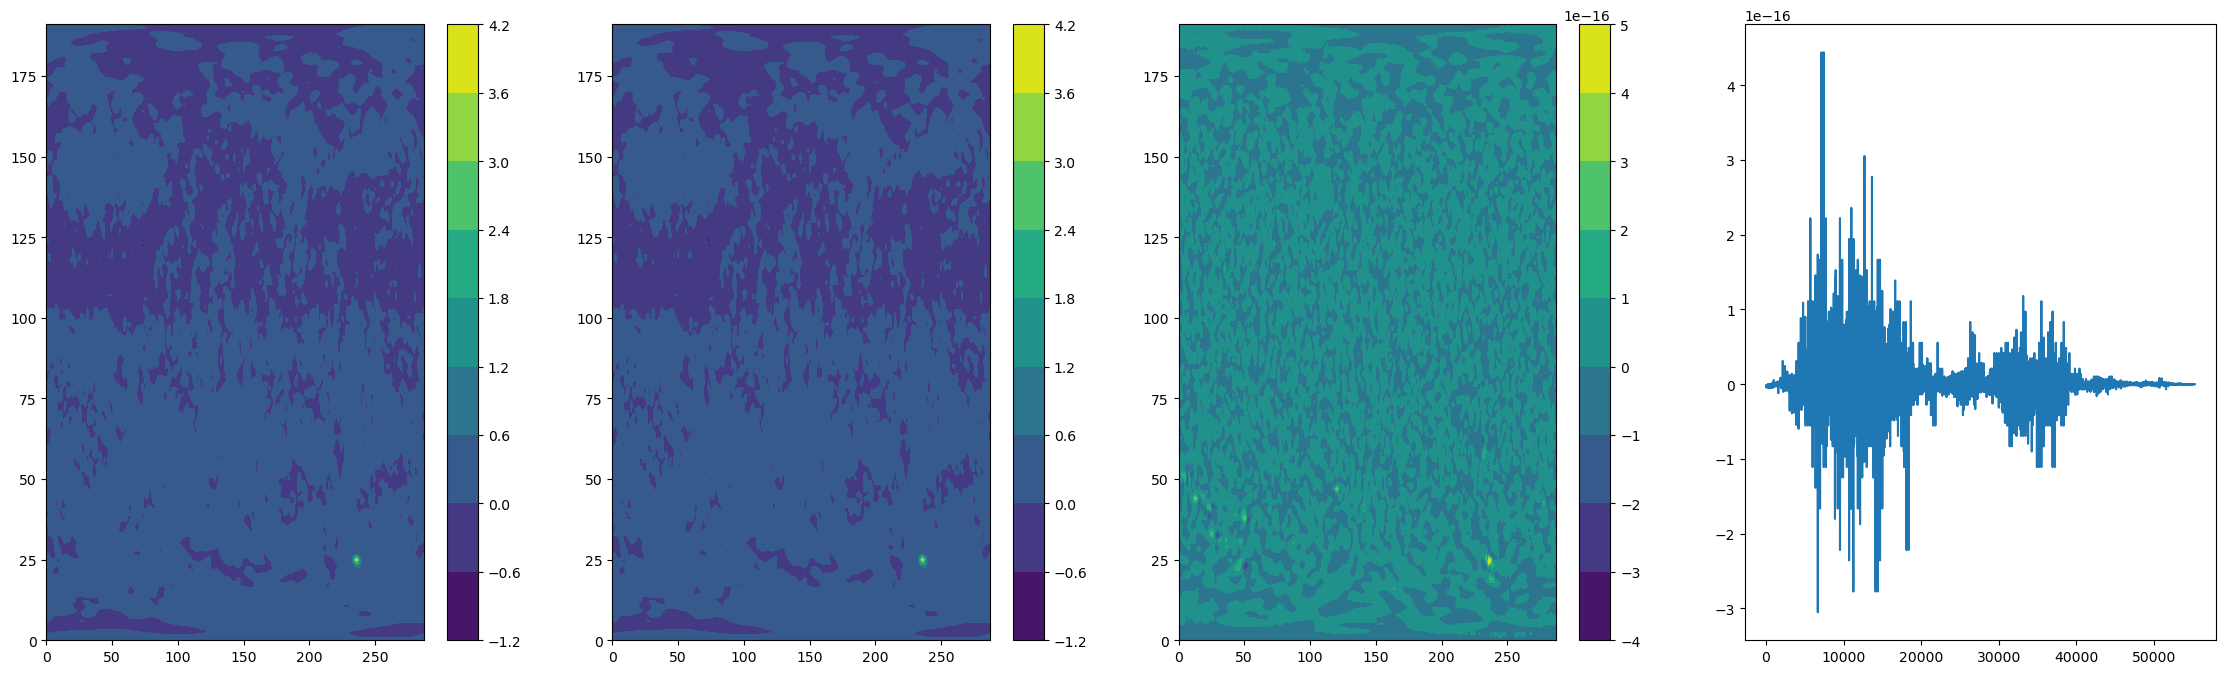

In [6]:
fig,axs=plt.subplots( 1,4, figsize=(28,8) ) 
ax=axs[0]
co=ax.contourf( uPomegaP[3,4,:,:] )
cbar = plt.colorbar( co )
ax=axs[1]
co=ax.contourf( upwp[0,38,:,:] )
cbar = plt.colorbar( co )
ax=axs[2]
co=ax.contourf( upwp[0,38,:,:] -  uPomegaP[3,4,:,:])
cbar = plt.colorbar( co )

ax=axs[3]
#ax.plot( upwp[0,38,:,:].flatten() )  # -  uPomegaP[0,4,:,:] )
ax.plot( (upwp[0,38,:,:] -  uPomegaP[3,4,:,:]).flatten() )



In [ ]:
X.PS.long_name

In [ ]:
Xoo.upwp